In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("bitcoin.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [11]:
df.drop('Adj Close', axis=1, inplace=True)

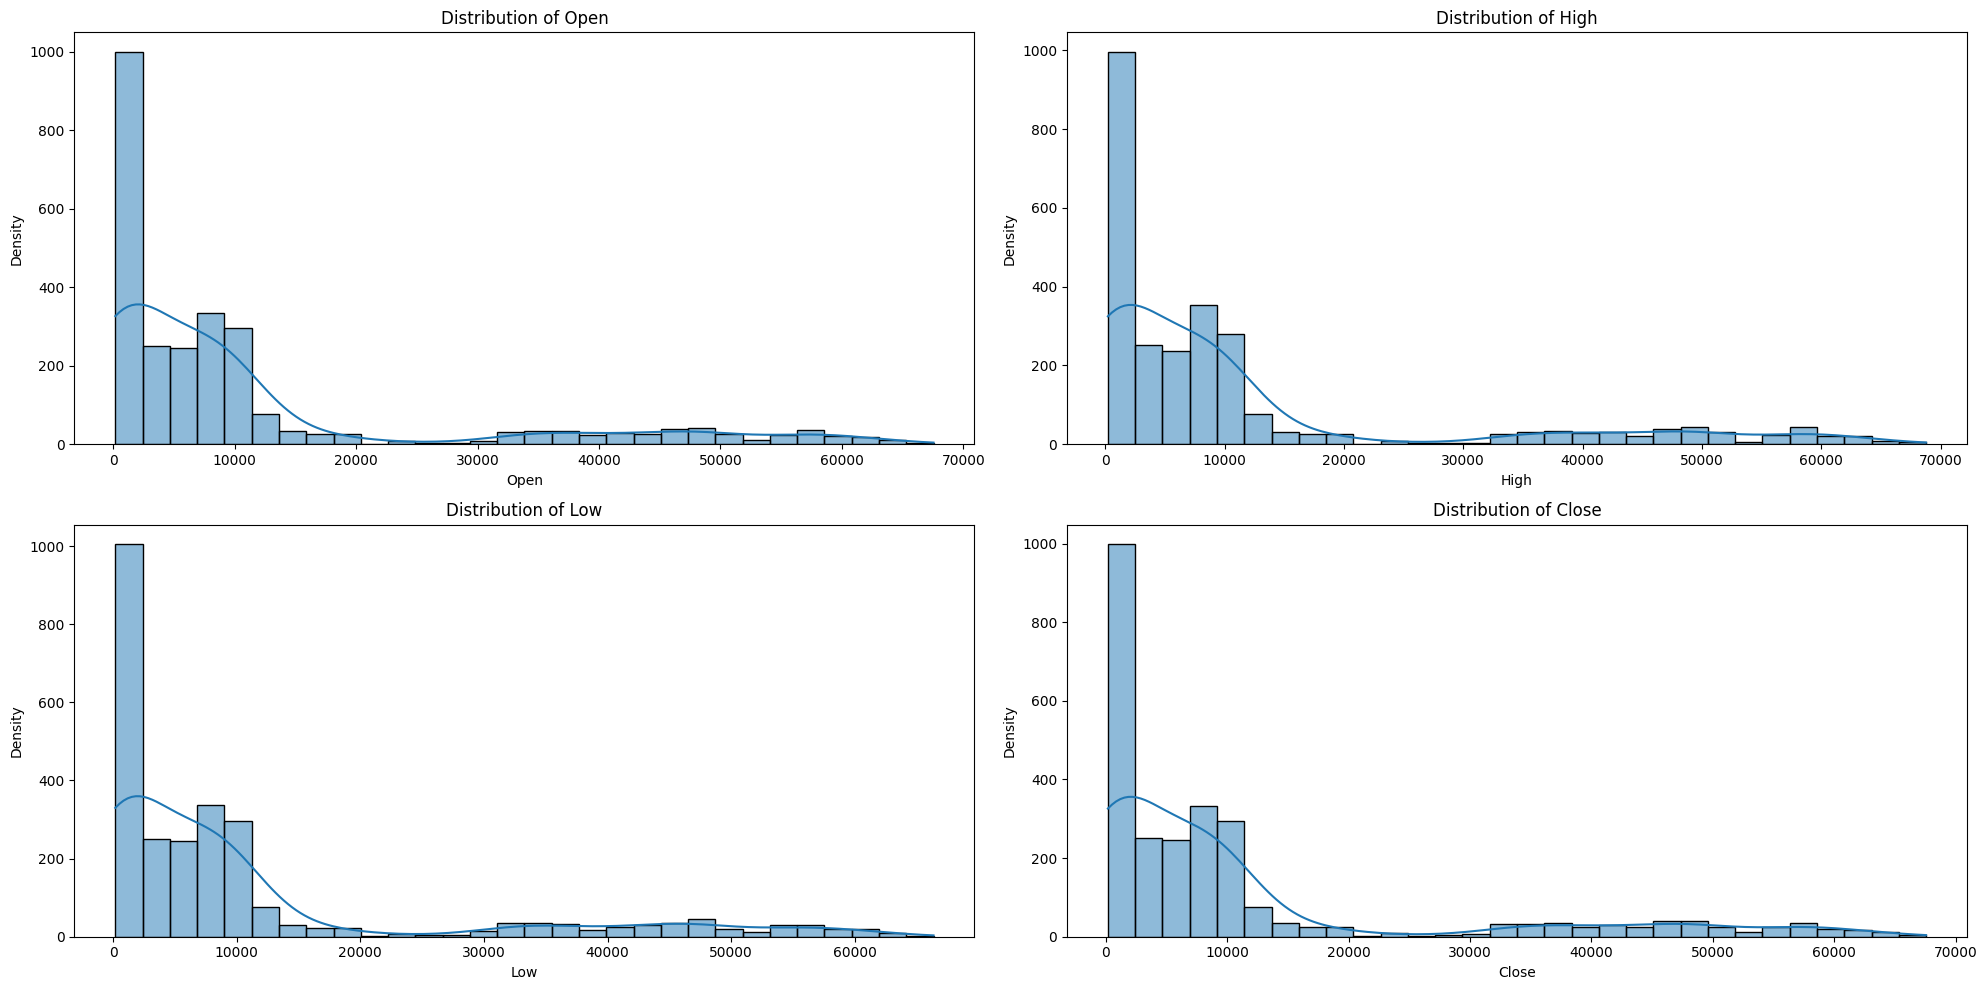

In [19]:
features = ['Open', 'High', 'Low', 'Close']
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
sns.histplot(df['Open'], kde=True, ax=axs[0, 0], bins=30)
axs[0, 0].set_title('Distribution of Open')
axs[0, 0].set_xlabel('Open')
axs[0, 0].set_ylabel('Density')

sns.histplot(df['High'], kde=True, ax=axs[0, 1], bins=30)
axs[0, 1].set_title('Distribution of High')
axs[0, 1].set_xlabel('High')
axs[0, 1].set_ylabel('Density')

sns.histplot(df['Low'], kde=True, ax=axs[1, 0], bins=30)
axs[1, 0].set_title('Distribution of Low')
axs[1, 0].set_xlabel('Low')
axs[1, 0].set_ylabel('Density')

sns.histplot(df['Close'], kde=True, ax=axs[1, 1], bins=30)
axs[1, 1].set_title('Distribution of Close')
axs[1, 1].set_xlabel('Close')
axs[1, 1].set_ylabel('Density')
plt.tight_layout()
plt.show()

In [20]:
df['Date'] = pd.to_datetime(df['Date']) 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2713 non-null   datetime64[ns]
 1   Open    2713 non-null   float64       
 2   High    2713 non-null   float64       
 3   Low     2713 non-null   float64       
 4   Close   2713 non-null   float64       
 5   Volume  2713 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 127.3 KB


In [25]:
df['Month'] = df["Date"].dt.month
df['Year'] = df["Date"].dt.year

In [26]:
df.head()

,Date,Open,High,Low,Close,Volume,Month,Year
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,9,2014
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,9,2014
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,9,2014
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,9,2014
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,9,2014


C:\Users\mark maher\AppData\Local\Temp\ipykernel_13332\3493280432.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = df.groupby('Year').mean().reset_index()


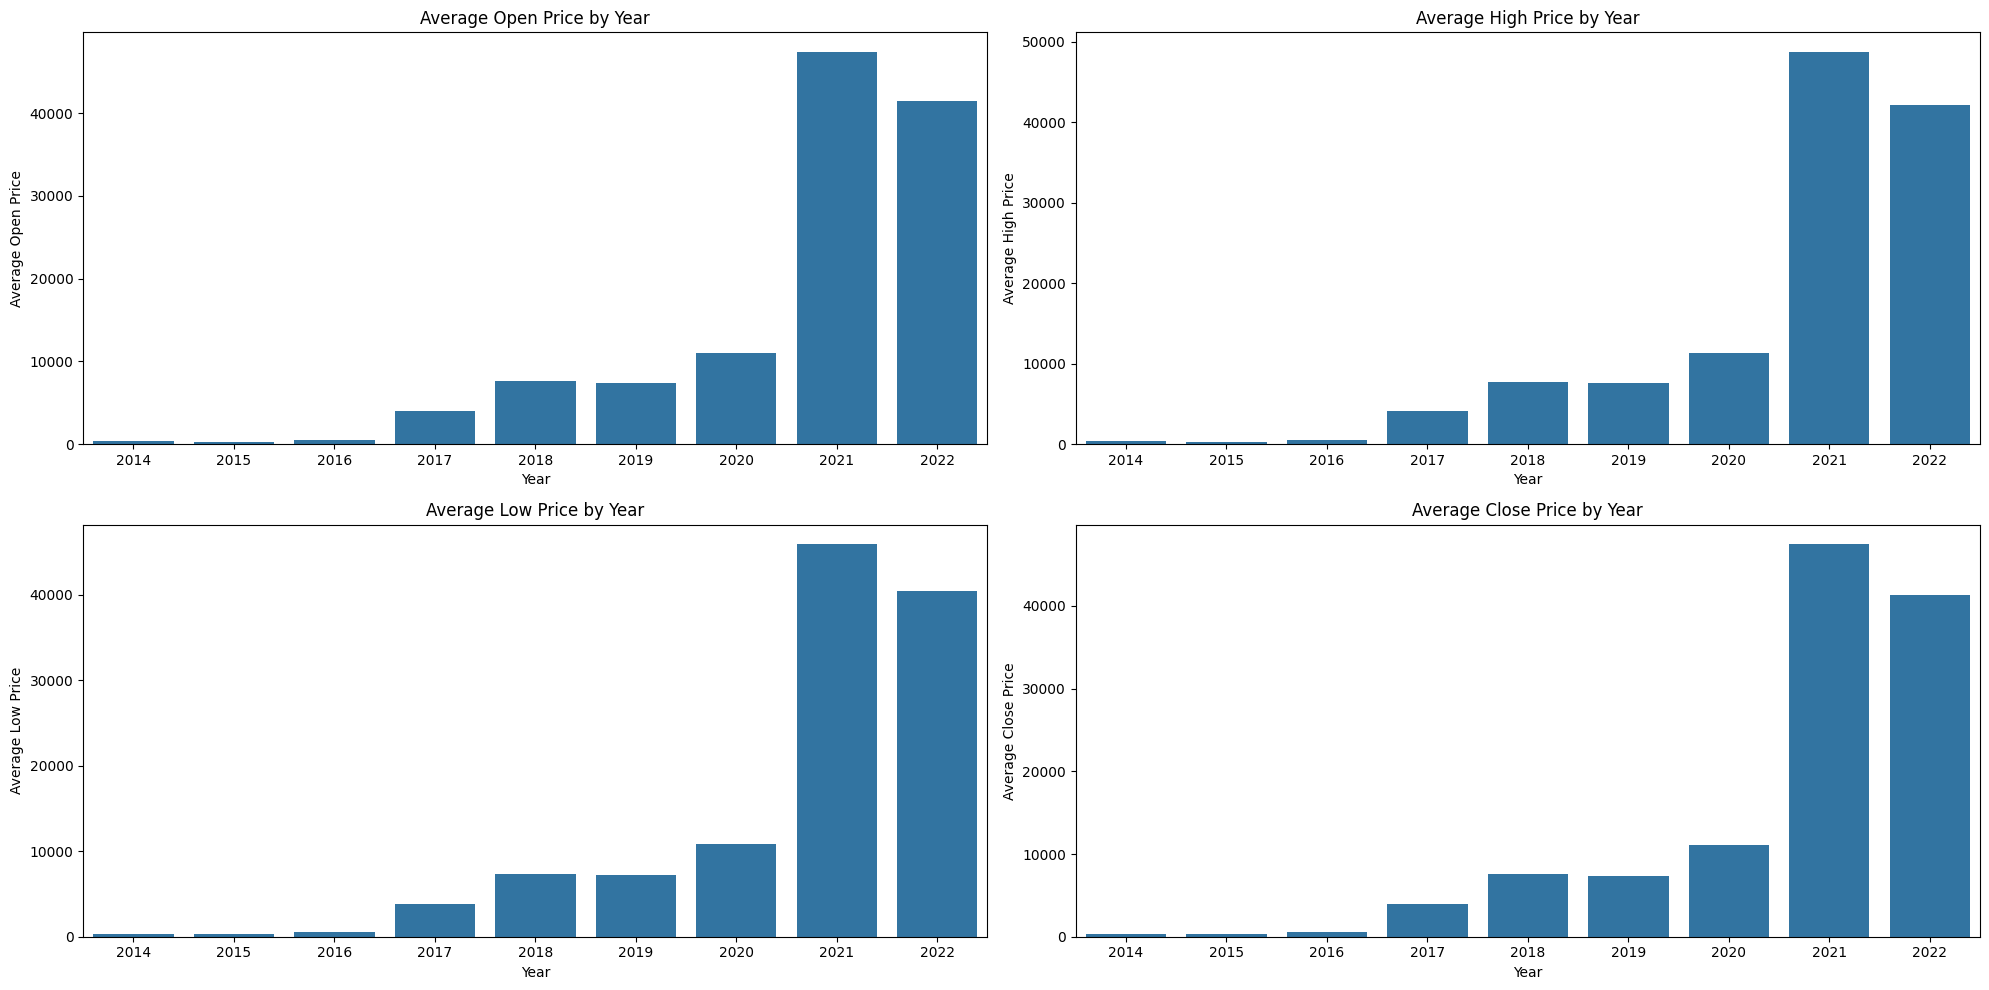

In [31]:
data_grouped = df.groupby('Year').mean().reset_index()

fig, axs = plt.subplots(2, 2, figsize=(20, 10))

sns.barplot(x='Year', y='Open', data=data_grouped, ax=axs[0, 0])
axs[0, 0].set_title('Average Open Price by Year')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Average Open Price')

sns.barplot(x='Year', y='High', data=data_grouped, ax=axs[0, 1])
axs[0, 1].set_title('Average High Price by Year')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Average High Price')

sns.barplot(x='Year', y='Low', data=data_grouped, ax=axs[1, 0])
axs[1, 0].set_title('Average Low Price by Year')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Average Low Price')

sns.barplot(x='Year', y='Close', data=data_grouped, ax=axs[1, 1])
axs[1, 1].set_title('Average Close Price by Year')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Average Close Price')

plt.tight_layout()
plt.show()

In [33]:
df['is_quarter_end'] = np.where(df['Month']%3==0,1,0)

In [34]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [45]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=101, test_size=0.3)

In [59]:
model = XGBClassifier()

In [60]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
print('Training Accuracy : ',roc_auc_score(y_train, model.predict_proba(x_train)[:,1]))


Training Accuracy :  0.92720760792142
